### Display of student performance file and creation of dummy variables

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df = pd.read_csv('Student Performance new.csv')
df.head().style.background_gradient(axis=0)

,Unnamed: 0,race/ethnicity,parental level of education,lunch,test preparation course,math percentage,reading score percentage,writing score percentage,sex
0,0,group B,bachelor's degree,standard,none,0.720000,0.720000,0.740000,F
1,1,group C,some college,standard,completed,0.690000,0.900000,0.880000,F
2,2,group B,master's degree,standard,none,0.900000,0.950000,0.930000,F
3,3,group A,associate's degree,free/reduced,none,0.470000,0.570000,0.440000,M
4,4,group C,some college,standard,none,0.760000,0.780000,0.750000,M


In [3]:
df.columns

Index(['Unnamed: 0', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math percentage',
       'reading score percentage', 'writing score percentage', 'sex'],
      dtype='object')

In [4]:
df.isnull().sum()

Unnamed: 0                     0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math percentage                0
reading score percentage       0
writing score percentage       0
sex                            0
dtype: int64

In [5]:
new_df = pd.get_dummies(df, columns = ['parental level of education','race/ethnicity','lunch','test preparation course'] ,drop_first= True,prefix = 'Dumy',prefix_sep ="*" )
new_df.head().style.background_gradient(axis=0)

,Unnamed: 0,math percentage,reading score percentage,writing score percentage,sex,Dumy*bachelor's degree,Dumy*high school,Dumy*master's degree,Dumy*some college,Dumy*some high school,Dumy*group B,Dumy*group C,Dumy*group D,Dumy*group E,Dumy*standard,Dumy*none
0,0,0.720000,0.720000,0.740000,F,1,0,0,0,0,1,0,0,0,1,1
1,1,0.690000,0.900000,0.880000,F,0,0,0,1,0,0,1,0,0,1,0
2,2,0.900000,0.950000,0.930000,F,0,0,1,0,0,1,0,0,0,1,1
3,3,0.470000,0.570000,0.440000,M,0,0,0,0,0,0,0,0,0,0,1
4,4,0.760000,0.780000,0.750000,M,0,0,0,1,0,0,1,0,0,1,1


### Display of boxplots for the first four dummy variables

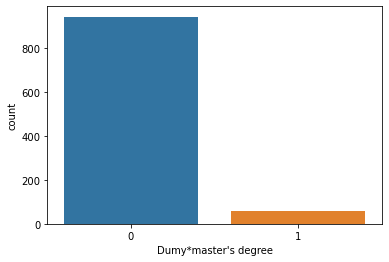

In [6]:
sns.countplot(data = new_df , x = "Dumy*master's degree")

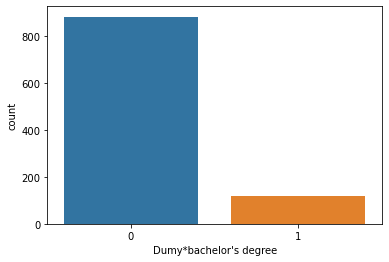

In [7]:
sns.countplot(data = new_df , x = "Dumy*bachelor's degree")

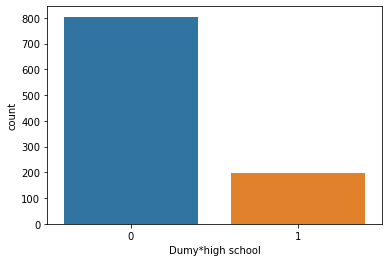

In [8]:
sns.countplot(data = new_df , x = "Dumy*high school")

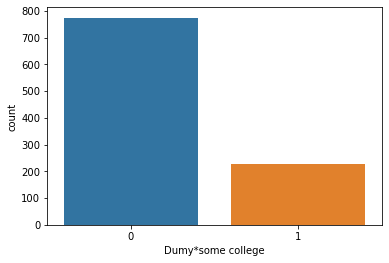

In [9]:
sns.countplot(data = new_df , x = "Dumy*some college")

### Creation of scatterplots of math percentage versus reading score percentage with each of the first four dummy variables as labels


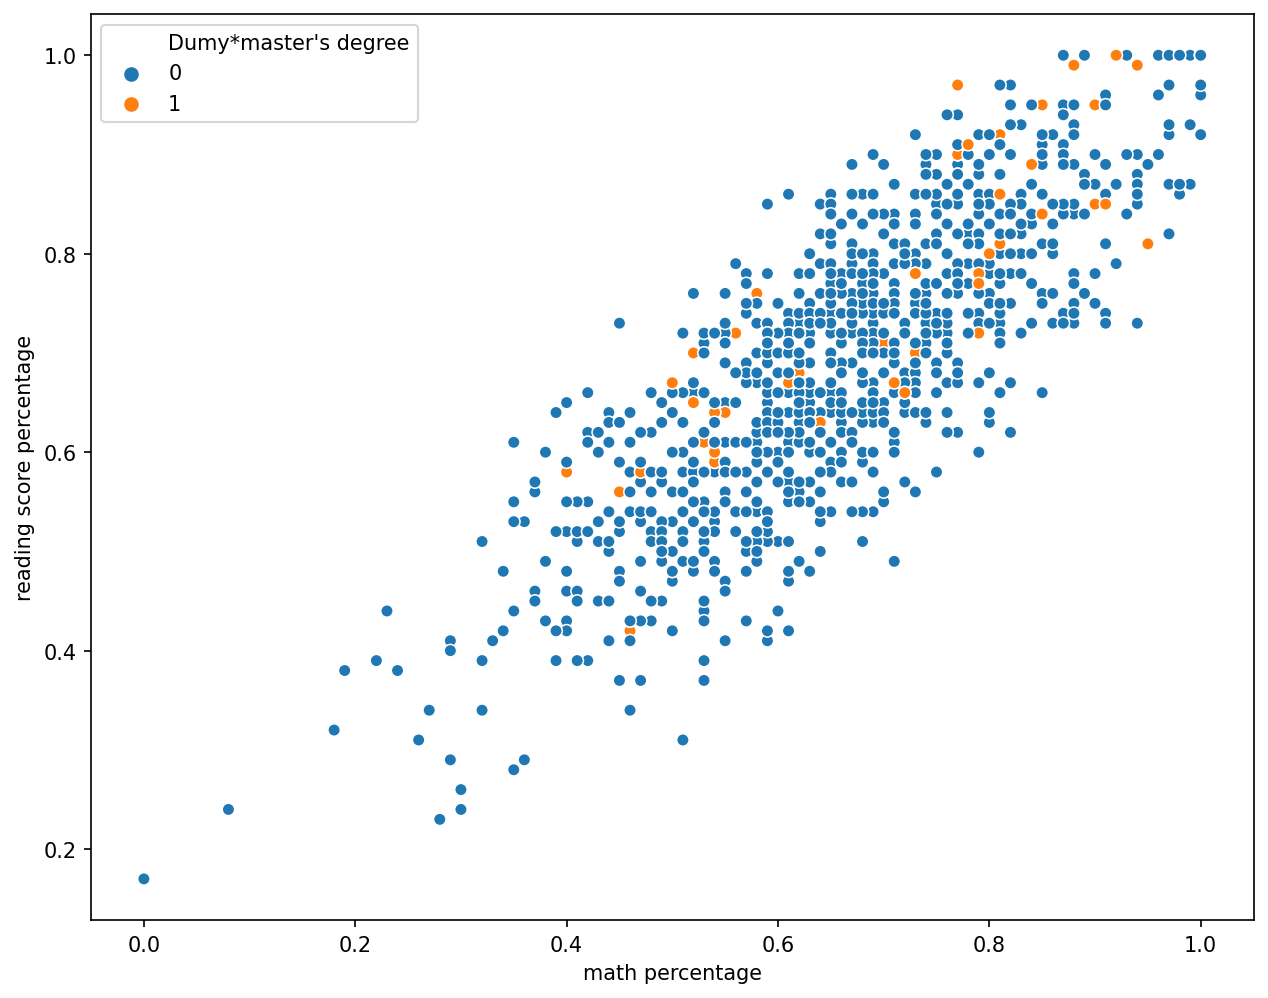

In [10]:
plt.figure(figsize=(10,8),dpi =150)
sns.scatterplot(data = new_df , x = 'math percentage',y= 'reading score percentage',hue = "Dumy*master's degree")

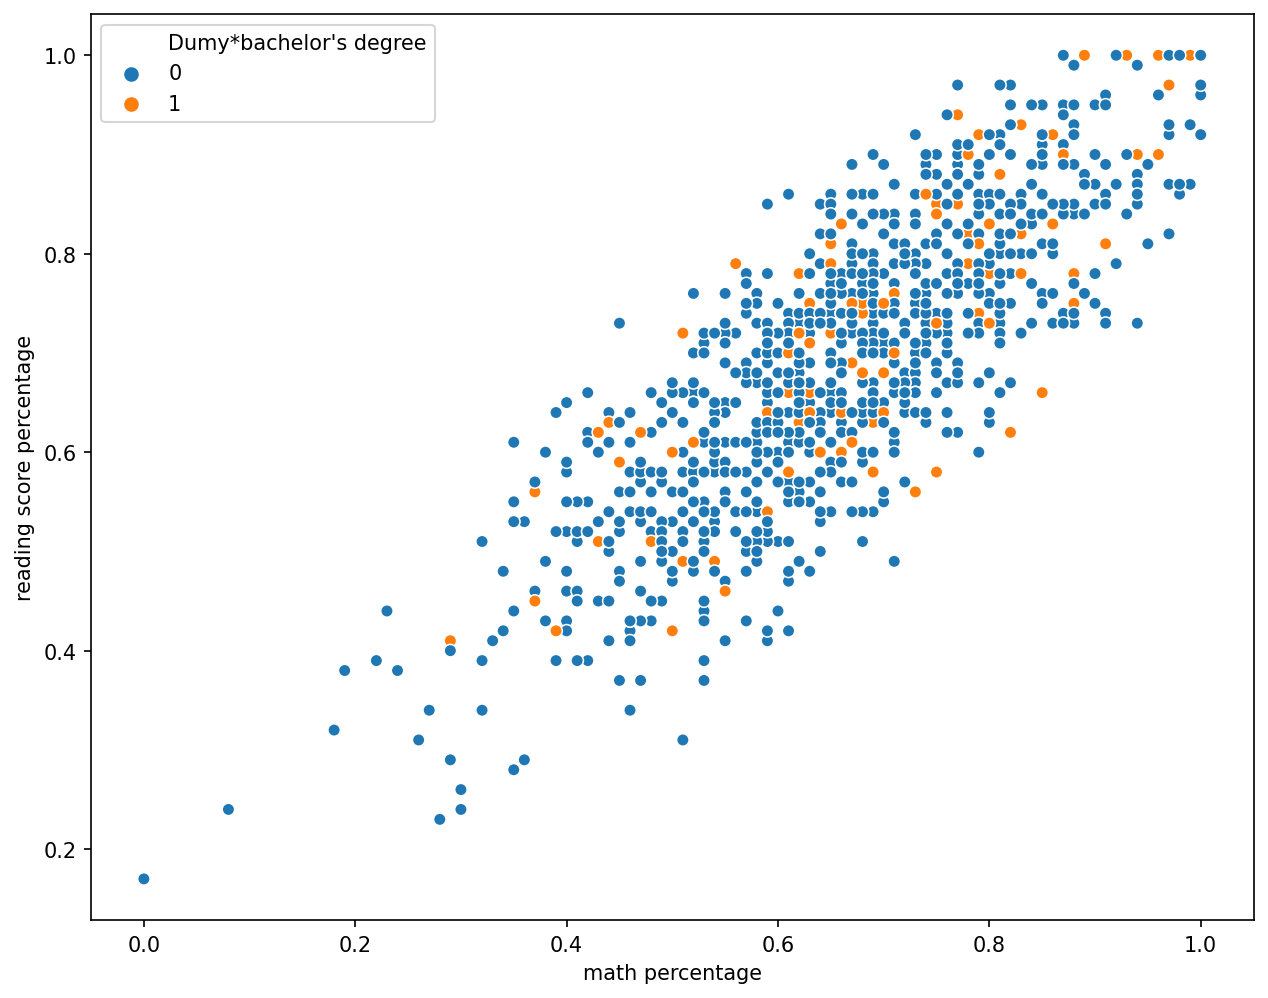

In [11]:
plt.figure(figsize=(10,8),dpi =150)
sns.scatterplot(data = new_df , x = 'math percentage',y= 'reading score percentage',hue = "Dumy*bachelor's degree")

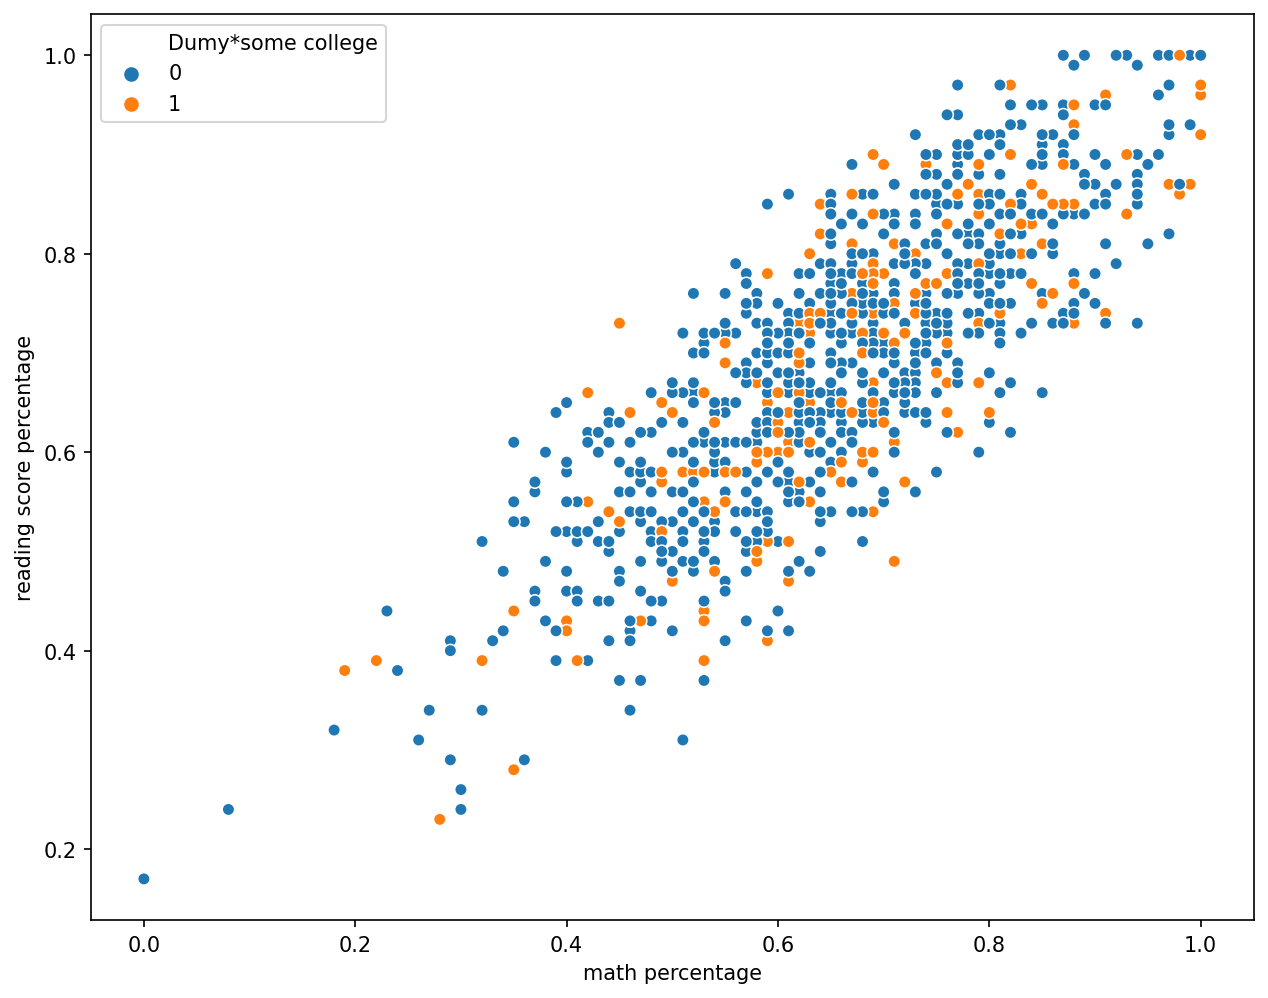

In [12]:
plt.figure(figsize=(10,8),dpi =150)
sns.scatterplot(data = new_df , x = 'math percentage',y= 'reading score percentage',hue = "Dumy*some college")

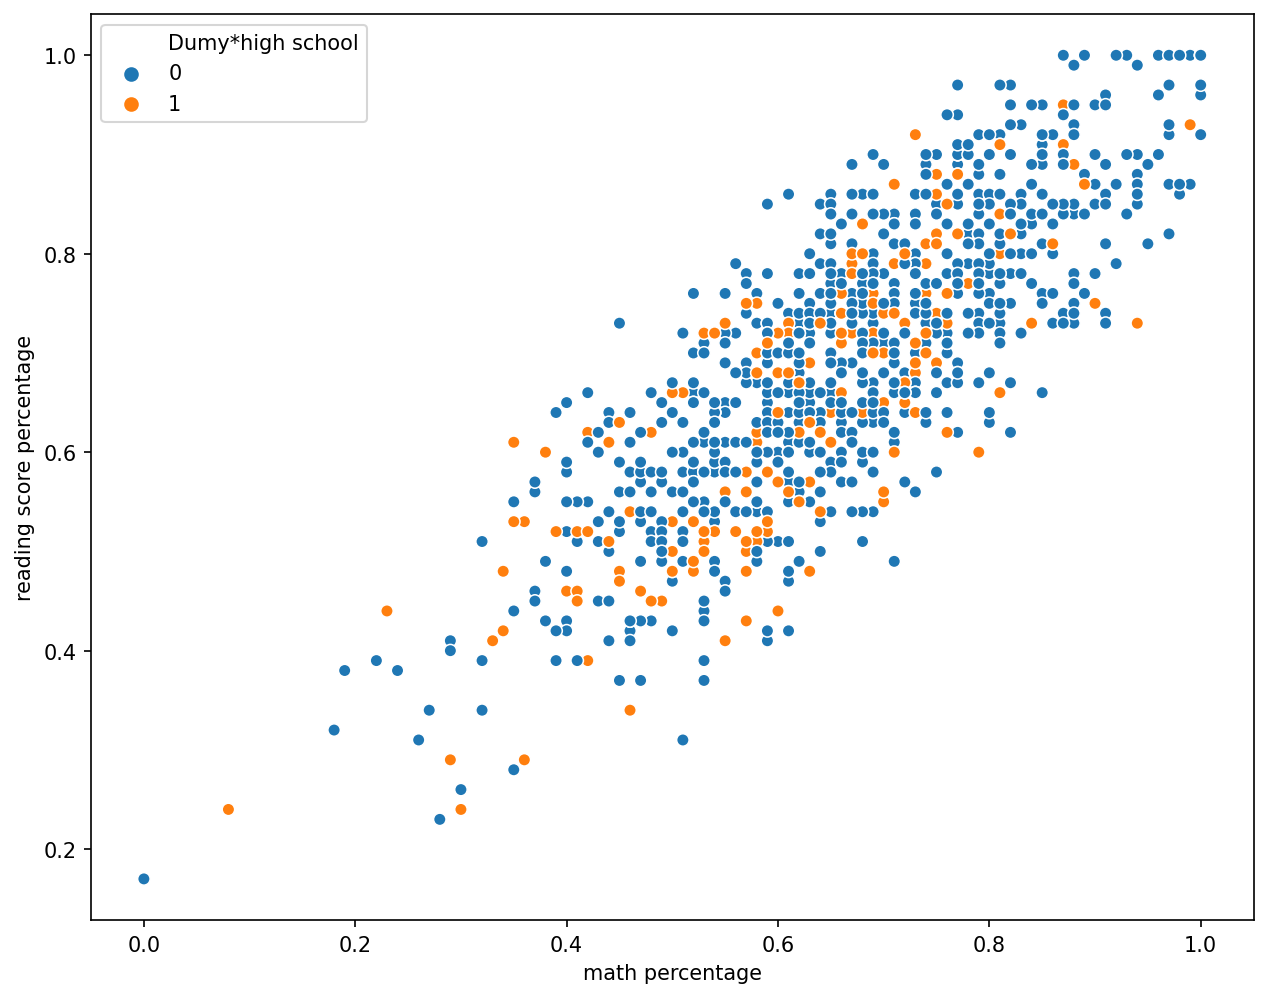

In [13]:
plt.figure(figsize=(10,8),dpi =150)
sns.scatterplot(data = new_df , x = 'math percentage',y= 'reading score percentage',hue = "Dumy*high school")

### Display of boxplots for math, reading, and writing percentage using the fourth dummy variable

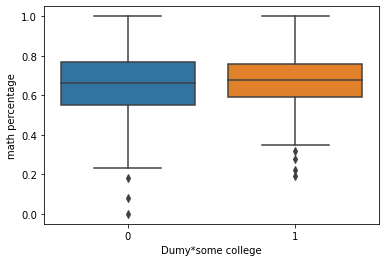

In [14]:
sns.boxplot(data = new_df , x ='Dumy*some college',y='math percentage')

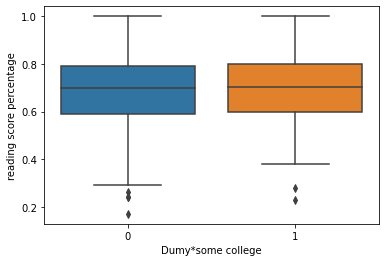

In [15]:
sns.boxplot(data = new_df , x ='Dumy*some college',y='reading score percentage')

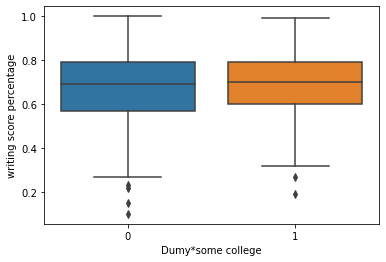

In [16]:
sns.boxplot(data = new_df , x ='Dumy*some college',y='writing score percentage')

### Prediction of the gender of a student attending some college using SVC

In [17]:
X = new_df.drop(columns=["sex", "Dumy*bachelor's degree", "Dumy*high school", "Dumy*master's degree", 
                         "Dumy*some high school", "Dumy*group B", "Dumy*group C", "Dumy*group D",
                        "Dumy*group E", "Dumy*standard", "Dumy*none", "math percentage"],axis = 1)
y = new_df['sex']

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101, shuffle=True)

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler()

In [22]:
scaler.fit(X_train)

StandardScaler()

In [23]:
scaled_x_train = scaler.transform(X_train)
scaled_x_test = scaler.transform(X_test)

In [24]:
from sklearn.svm import SVC

In [25]:
svc = SVC()
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.001,0.01,0.1,0.5,1]}
grid = GridSearchCV(svc,param_grid)
grid.fit(scaled_x_train,y_train)

GridSearchCV(estimator=SVC(), param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1]})

In [26]:
grid.best_params_

{'C': 1}

In [27]:
y_pred = grid.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score , plot_confusion_matrix , plot_roc_curve , classification_report

In [29]:
svc_accuracy = accuracy_score(y_test,y_pred)
svc_accuracy

0.5666666666666667

In [30]:
print(classification_report(y_test,y_pred, zero_division=0))

              precision    recall  f1-score   support

           F       0.57      1.00      0.72        85
           M       0.00      0.00      0.00        65

    accuracy                           0.57       150
   macro avg       0.28      0.50      0.36       150
weighted avg       0.32      0.57      0.41       150



### Prediction of the gender of a student attending some college using KNN

In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
test_error_rates = []
for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_x_train,y_train)
    y_prediction = knn_model.predict(X_test)
    test_error = 1- accuracy_score(y_test , y_prediction)
    test_error_rates.append(test_error)

Text(0.5, 0, 'K Neigbors')

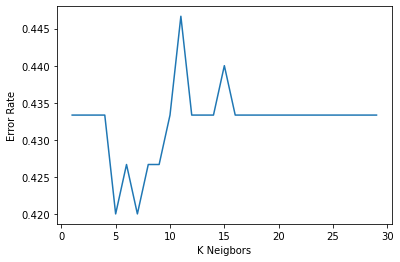

In [33]:
plt.plot(range(1,30),test_error_rates)
plt.ylabel('Error Rate')
plt.xlabel('K Neigbors')

In [34]:
model = KNeighborsClassifier(n_neighbors=7)
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [35]:
y_predictions = model.predict(X_test)
print(classification_report(y_test,y_predictions, zero_division=0))

              precision    recall  f1-score   support

           F       0.62      0.55      0.58        85
           M       0.49      0.55      0.52        65

    accuracy                           0.55       150
   macro avg       0.55      0.55      0.55       150
weighted avg       0.56      0.55      0.56       150



In [36]:
knn_model_accuracy = accuracy_score(y_test,y_predictions)
knn_model_accuracy

0.5533333333333333

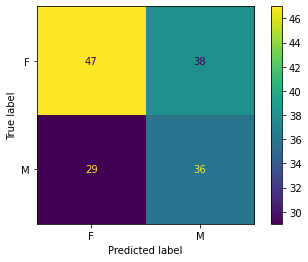

In [37]:
plot_confusion_matrix(model,X_test,y_test)

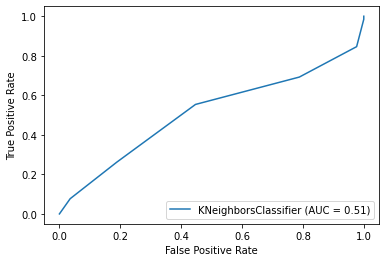

In [38]:
plot_roc_curve(model,X_test,y_test)

### Prediction of the gender of a student attending some college using Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
log_model = LogisticRegression()
log_model.fit(scaled_x_train,y_train)

LogisticRegression()

In [41]:
predections = log_model.predict(scaled_x_test)

In [42]:
logistic_regression_model_accuracy = accuracy_score(y_test,predections)
logistic_regression_model_accuracy

0.6866666666666666

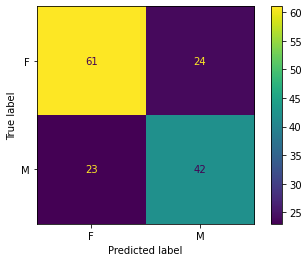

In [43]:
plot_confusion_matrix(log_model,scaled_x_test,y_test)

In [44]:
print(classification_report(y_test,predections))

              precision    recall  f1-score   support

           F       0.73      0.72      0.72        85
           M       0.64      0.65      0.64        65

    accuracy                           0.69       150
   macro avg       0.68      0.68      0.68       150
weighted avg       0.69      0.69      0.69       150



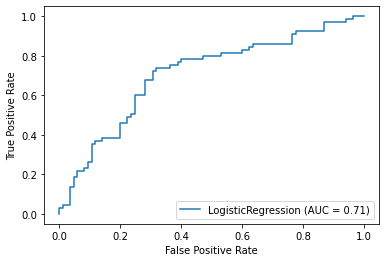

In [45]:
plot_roc_curve(log_model,scaled_x_test,y_test)